# Decision Tree 실습

## 1. DecisionTree Classifier

In [ ]:
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 핵심 파라미터

- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터수 ( 과적합을 제어하는데 사용 )
  - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
- min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수, min_samples_split과 함께 과적합 제어 용도,불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요
- max_features: 최적의 분할을 위해 고려할 최대 feature 개수
  - Default = None → 데이터 세트의 모든 피처를 사용, int형으로 지정 →피처 갯수 / float형으로 지정 →비중, sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정, log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정
- max_depth : 트리의 최대 깊이
  - default = None → 완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할, 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
- max_leaf_nodes: 리프노드의 최대 개수

In [ ]:
# 트리 학습하기
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# 학습된 모델을 test 데이터로 테스트해보고, 정확도도 구해봅시다.

from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.98


In [ ]:
# Decision Tree 시각화
!pip install graphviz

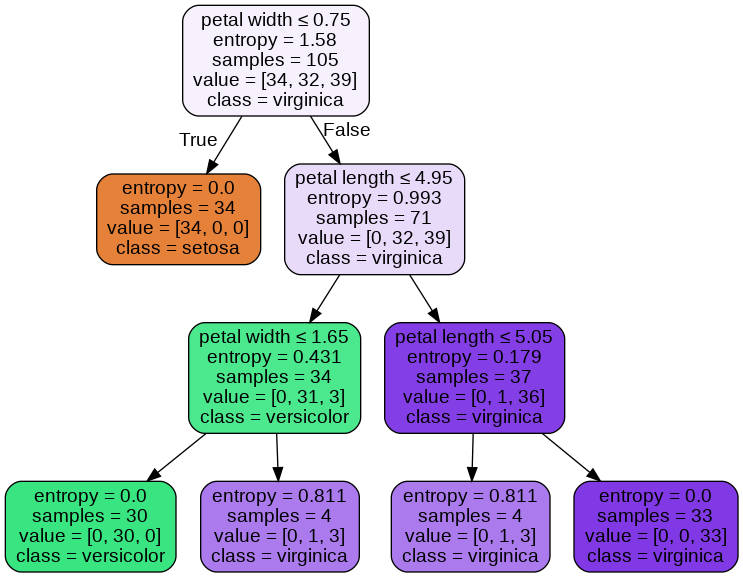

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'],
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 2. 실습 과제 - DecisionRegressor 구현해보기
* 데이터셋: 자유롭게 선택
* 예측 및 실제 데이터 시각화까지!

In [ ]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz 

DecisionTreeRegressor는 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없다.

참고: https://dataoutpost.wordpress.com/2018/04/04/simple-feature-selection-and-decision-tree-regression-for-boston-house-price-dataset-part-1/

In [ ]:
data= load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


 [01]  CRIM 자치시(town) 별 1인당 범죄율  
 [02]  ZN 25,000 평방피트를 초과하는 거주지역의 비율  
 [03]  INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
 [04]  CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
 [05]  NOX 10ppm 당 농축 일산화질소  
 [06]  RM 주택 1가구당 평균 방의 개수  
 [07]  AGE 1940년 이전에 건축된 소유주택의 비율  
 [08]  DIS 5개의 보스턴 직업센터까지의 접근성 지수  
 [09]  RAD 방사형 도로까지의 접근성 지수  
 [10]  TAX 10,000 달러 당 재산세율  
 [11]  PTRATIO 자치시(town)별 학생/교사 비율  
 [12]  B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.  
 [13]  LSTAT 모집단의 하위계층의 비율(%)  
 [14]  MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [ ]:
def fit_model(data, target):
  tree= DecisionTreeRegressor()
  tree.fit(data,target)
  return tree

boston= load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=3)

In [ ]:
# 모델 fitting
regression = fit_model(X_train, y_train)

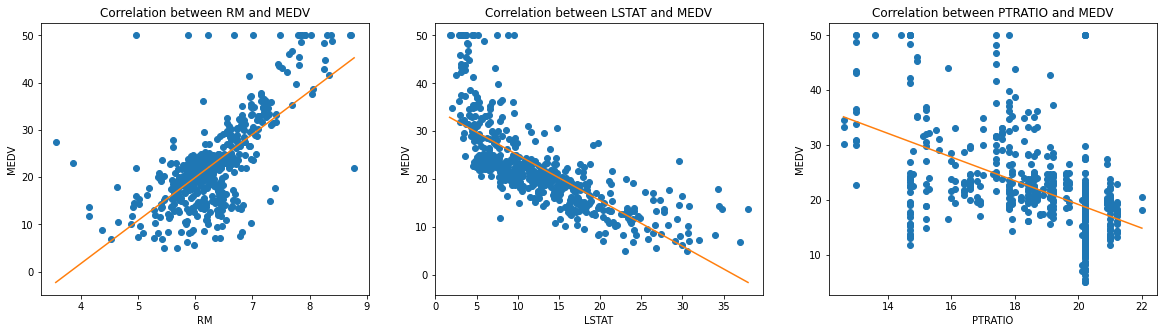

In [ ]:
# 회귀선 시각화 (hint: for문 사용)
plt.figure(figsize=(20,5))
medv= data.target
data= df[['RM', 'LSTAT', 'PTRATIO']]

for i, col in enumerate(data.columns):
  plt.subplot(1,3,i+1)
  x= data[col]
  y= medv
  plt.plot(x,y,'o')
  plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
  plt.title('Correlation between ' + col + ' and MEDV')
  plt.xlabel(col)
  plt.ylabel('MEDV')

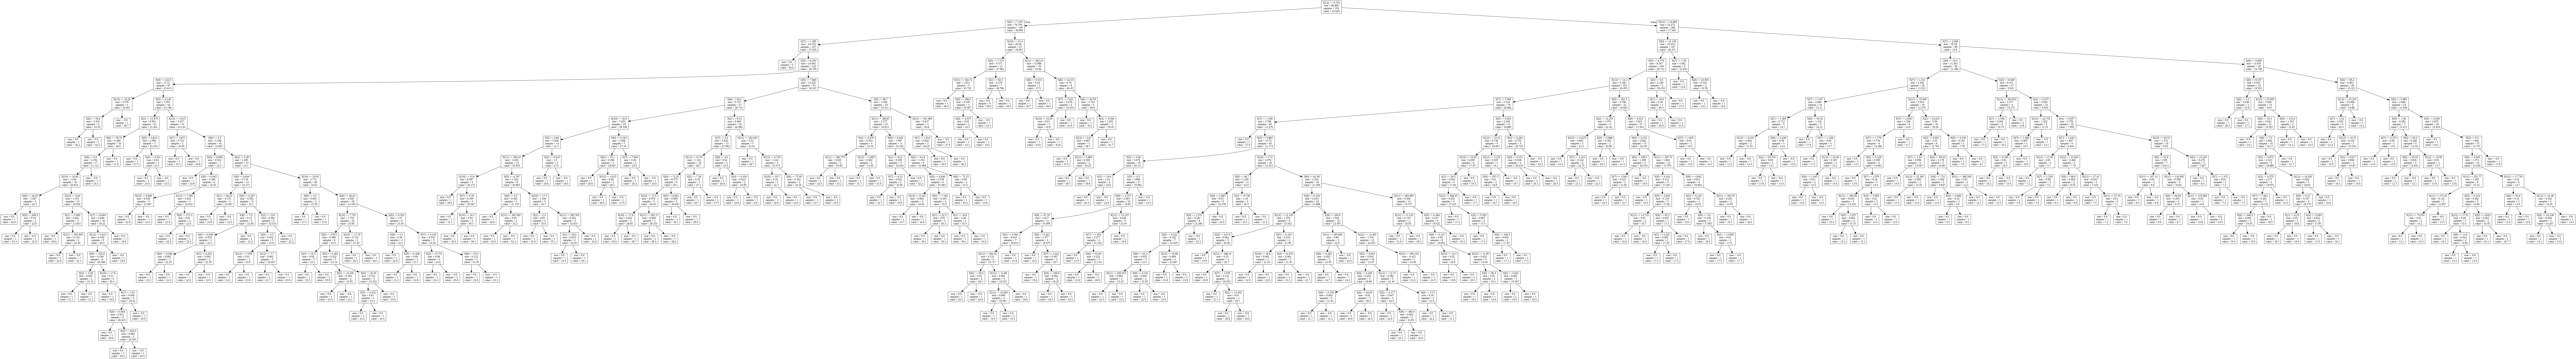

In [ ]:
# tree 시각화
export_graphviz(regression, out_file ='tree.dot') 
with open("tree.dot") as f:
    dot_graph = f.read()

# 이미지화
pydot_graph = pydotplus.graph_from_dot_file("tree.dot")
Image(pydot_graph.create_png())

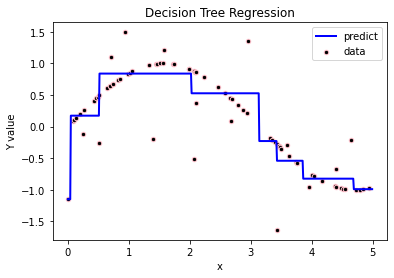

In [ ]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X, y)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_hat = regtree.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="pink", c="black", label="data")
plt.plot(X_test, y_hat, color="blue", linewidth=2, label="predict")
plt.xlabel("x")
plt.ylabel("Y value")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(X_test, y_hat)
mse

9.73386795931443

# Bagging & Ensemble 실습

# 0. Voting 예제

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 데이터
X = np.array([[-1, -1, -10], [-3, -2, 9], [1, 5, 5], [2, 10, 2], [3, 2, -5]])
y = np.array([1, 1, 2, 2, 2])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf_soft = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf_soft = eclf_soft.fit(X, y)

eclf_hard = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf_hard = eclf_hard.fit(X, y)

print('Soft voting 방법:', eclf_soft.predict(X))
print('Hard voting 방법:', eclf_soft.predict(X))

Soft voting 방법: [1 1 2 2 2]
Hard voting 방법: [1 1 2 2 2]


# 1. Bagging 회귀

## 1.1 데이터셋 준비

In [ ]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes

raw_boston = load_boston()
boston_data = pd.DataFrame(raw_boston.data, columns = raw_boston.feature_names)
boston_data['target'] = raw_boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 데이터 사이즈 확인
boston_data.shape

(506, 14)

In [ ]:
from sklearn.model_selection import train_test_split
# 데이터셋 분리
bs_X_train, bs_X_test, bs_y_train, bs_y_test = train_test_split(raw_boston.data, raw_boston.target,
                                                    test_size=0.3, random_state=42)
print('X_train의 shape:', bs_X_train.shape)
print('X_test의 shape:', bs_X_test.shape)
print('y_train의 shape:', bs_y_train.shape)
print('y_test의 shape:', bs_y_test.shape)

X_train의 shape: (354, 13)
X_test의 shape: (152, 13)
y_train의 shape: (354,)
y_test의 shape: (152,)


## 1.2 Bagging 회귀 모델 만들기
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html
- 주요 파라미터:
    - base_estimator
    - n_estimators
    - max_samples
    - max_features
    - bootstrap
    - bootstrap_features

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [ ]:
reg_tree = DecisionTreeRegressor(random_state = 42)
reg_bagg = BaggingRegressor(base_estimator = reg_tree,
                            n_estimators =10, random_state = 42)

reg_bagg = reg_bagg.fit(bs_X_train, bs_y_train)
bs_pred_test = reg_bagg.predict(bs_X_test)

In [ ]:
from sklearn.metrics import mean_squared_error # 평균 제곱 오차

mean_squared_error(bs_pred_test, bs_y_test)

10.085227631578945

# 2. Bagging 분류

## 2.1 데이터셋 준비

In [ ]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

raw_data = load_iris()
data = pd.DataFrame(raw_data.data, columns = raw_data.feature_names)
data['class'] = raw_data.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

In [ ]:
# 데이터 사이즈 확인
data.shape

(150, 5)

In [ ]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(raw_data.data, raw_data.target,
                                                    test_size = 0.3, random_state = 0)
print('X_train의 shape:', X_train.shape)
print('X_test의 shape:', X_test.shape)
print('y_train의 shape:', y_train.shape)
print('y_test의 shape:', y_test.shape)

X_train의 shape: (105, 4)
X_test의 shape: (45, 4)
y_train의 shape: (105,)
y_test의 shape: (45,)


## 2.2 Bagging 분류 모델 만들기
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
- 주요 파라미터
    - base_estimator:
    - n_estimators
    - max_samples
    - max_features
    - bootstrap
    - bootstrap_features

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
bagging_classifier = BaggingClassifier(base_estimator = neigh,
                                       n_estimators=5, bootstrap=True)

bagging_classifier = bagging_classifier.fit(X_train, y_train)
pred_test = bagging_classifier.predict(X_test)

print('acc score:', round(accuracy_score(y_test, pred_test), 3)) # accuracy_score

acc score: 0.978


# 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred)

print('랜덤 포레스트 acc:', round(accuracy_score(y_test , pred), 3))

랜덤 포레스트 acc: 0.978


In [ ]:
# 변수 중요도 보기
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = data.columns[:4])
ftr = ftr_importances.sort_values(ascending=False)[:4] # 10
ftr

petal width (cm)     0.429592
petal length (cm)    0.400583
sepal length (cm)    0.143345
sepal width (cm)     0.026480
dtype: float64

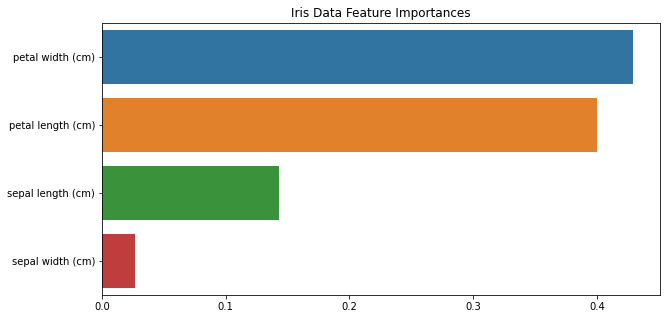

In [ ]:
# 변수 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,5))
plt.title('Iris Data Feature Importances')
sns.barplot(x = ftr, y = ftr.index)
plt.show()

# 4. 실습 과제 - 배깅 구현해보기 
* 분류, 회귀 둘 중 하나 구현해보기
* 데이터셋: 자유롭게 선택
* Hint) for문과 random 이용

- 머신러닝 Ensemble 방법 중 하나 
- Classification 과  regression 모두 사용 가능 
- 오버피팅 방지, Variance 감소
- 주로 Decision Tree 에서 많이 사용하지만, 어떤 알고리즘에도 사용 가능

Train Data 에서 복원추출로 m 개의 데이터셋을 만들고, 각 m 개의 hypothesis  를 만든다. 

최종 결정은 m 개의 hypothesis값을 가지고 평균값이나 , voting 을 하여 결정한다. 


코드 참고: https://todayisbetterthanyesterday.tistory.com/50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/kc_house_data.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1.0,0,3,7,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2.0,0,3,7,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,1.0,0,3,6,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,5,7,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1.0,0,3,8,1987,0,98074,47.6168,-122.045
5,7237550310,20140512T000000,1230000.0,4,4.50,1.0,0,3,11,2001,0,98053,47.6561,-122.005
6,1321400060,20140627T000000,257500.0,3,2.25,2.0,0,3,7,1995,0,98003,47.3097,-122.327
7,2008000270,20150115T000000,291850.0,3,1.50,1.0,0,3,7,1963,0,98198,47.4095,-122.315
8,2414600126,20150415T000000,229500.0,3,1.00,1.0,0,3,7,1960,0,98146,47.5123,-122.337
9,3793500160,20150312T000000,323000.0,3,2.50,2.0,0,3,7,2003,0,98038,47.3684,-122.031


In [ ]:
# 무의미한 변수 제거

data = data.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis = 1) # id, date, zipcode, lat, long  제거

In [ ]:
# features/target, train/test dataset 분리

feature_columns = list(data.columns.difference(['price'])) # Price를 제외한 행
X = data[feature_columns] # 설명변수 
y = data['price']  
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

print('X_train의 shape:', X_train.shape)
print('X_test의 shape:', X_test.shape)
print('y_train의 shape:', y_train.shape)
print('y_test의 shape:', y_test.shape)


X_train의 shape: (15129, 8)
X_test의 shape: (6484, 8)
y_train의 shape: (15129,)
y_test의 shape: (6484,)


In [ ]:
# Bagging 구현 코드
import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import r2_score

bagging_predict_result = []
acc_result= []

for _ in range(10):   # 데이터셋을 10번 반복복원추출, Sampling 개수와 동일
    # 반복 복원추출과정
    data_index = [data_index for data_index in range(X_train.shape[0])]
    random_data_index = np.random.choice(data_index, X_train.shape[0]) # 복원추출
    
    # 선형회귀모델
    sm_X_train = X_train.iloc[random_data_index,]
    sm_y_train = y_train.iloc[random_data_index,]
    sm_X_train = sm.add_constant(sm_X_train, has_constant="add")
    sm_model = sm.OLS(sm_y_train,sm_X_train)
    sm_test_x = sm.add_constant(X_test, has_constant="add")
    fitted_sm_model = sm_model.fit()
    
    # 각 데이터셋의 예측결과
    pred = fitted_sm_model.predict(sm_test_x)
    bagging_predict_result.append(pred)
    acc = r2_score(y_test, pred).round(3)
    acc_result.append(acc)

    # 예측 오차(RMSE)
    print(sqrt(mean_squared_error(pred,y_test)))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


239768.14159463497
239802.28821589035
240030.9684303643
239752.38834600686
239725.36609332732
240244.57578108297
239838.17350637648
239650.95086340155
239902.48655422428
239543.6934858195


In [ ]:
# 모델들 예측 결과
print(acc_result)

[0.602, 0.602, 0.601, 0.602, 0.602, 0.601, 0.602, 0.603, 0.602, 0.603]


In [ ]:
# 최종 결과 (평균 계산)
print(f"최종 결과: {np.mean(acc_result).round(3)}")

최종 결과: 0.602


In [ ]:
# DecisionTree 모델 생성

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

decision_tree_model = DecisionTreeRegressor() # 의사결정나무 모형
tree_model1 = decision_tree_model.fit(X_train, y_train) # 학습 데이터를 의사결정나무 모형에 적합
predict1 = tree_model1.predict(X_test) # 학습된 의사결정나무 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(predict1, y_test)))) # RMSE 결과
print(f"최종 결과: {r2_score(y_test, predict1).round(3)}") 

RMSE: 285293.2508816128
최종 결과: 0.437


In [ ]:
# DecisionTree sampling 30 - bagging

bagging_decision_tree_model1 = BaggingRegressor(base_estimator = decision_tree_model, # 의사결정나무 모형
                                                n_estimators = 30, # 5번 샘플링
                                                verbose = 1) # 학습 과정 표시
tree_model2 = bagging_decision_tree_model1.fit(X_train, y_train) # 학습 진행
predict2 = tree_model2.predict(X_test) # 학습된 Bagging 의사결정나무 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(predict2, y_test)))) # RMSE 결과
print(f"최종 결과: {r2_score(y_test, predict2).round(3)}") 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 233695.02240412202
최종 결과: 0.622


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


### **정확도가 낮아 다른 데이터로 다시 구현 **


In [ ]:
raw_data= load_wine()
X = pd.DataFrame(raw_data.data, columns = raw_data.feature_names)
y = raw_data.target #class label
y = pd.DataFrame(y)
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [ ]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Class label                     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

print('X_train의 shape:', X_train.shape)
print('X_test의 shape:', X_test.shape)
print('y_train의 shape:', y_train.shape)
print('y_test의 shape:', y_test.shape)

X_train의 shape: (142, 13)
X_test의 shape: (36, 13)
y_train의 shape: (142, 1)
y_test의 shape: (36, 1)


In [ ]:
# Bagging 구현 코드
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

acc_result2 = []

for i in range(10):
    #model
    model = LogisticRegression(solver='saga', max_iter=7500) 

    #random
    x_num= X_train.shape[0]
    ranidx = np.random.choice(X_train.index, x_num)

    #train
    fitmodel = model.fit(X.iloc[ranidx], y.iloc[ranidx]) 

    #predict
    pred = fitmodel.predict(X_test)

    #accuracy
    acc = r2_score(y_test, pred).round(3)
    acc_result2.append(acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
# 모델들 예측 결과
print(acc_result2)

[0.899, 0.899, 0.95, 0.95, 0.849, 0.899, 0.899, 0.95, 0.899, 0.749]


In [ ]:
# 최종 결과 (평균 계산)
print(f"최종 결과: {np.mean(acc_result2).round(3)}")

최종 결과: 0.894
